In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
from IPython.display import Image

In [4]:
dataset=pd.read_csv('C:\\Users\\Ghost\\Desktop\\AIML\\c2c-ai\\CW-2\\golf.csv',index_col=0)

In [5]:
print(dataset.head)

<bound method NDFrame.head of      Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5      rainy        cool   normal   True   no
6   overcast        cool   normal   True  yes
7      sunny        mild     high  False   no
8      sunny        cool   normal  False  yes
9      rainy        mild   normal  False  yes
10     sunny        mild   normal   True  yes
11  overcast        mild     high   True  yes
12  overcast         hot   normal  False  yes
13     rainy        mild     high   True   no>


In [6]:
#one hot encoding
x=pd.get_dummies(dataset[['Outlook','Temperature','Humidity','Windy']])
#x.loc[:,'Windy'].replace([False,True],[0,1],inplace=True)
print(x)

    Windy  Outlook_overcast  Outlook_rainy  Outlook_sunny  Temperature_cool  \
0   False                 0              0              1                 0   
1    True                 0              0              1                 0   
2   False                 1              0              0                 0   
3   False                 0              1              0                 0   
4   False                 0              1              0                 1   
5    True                 0              1              0                 1   
6    True                 1              0              0                 1   
7   False                 0              0              1                 0   
8   False                 0              0              1                 1   
9   False                 0              1              0                 0   
10   True                 0              0              1                 0   
11   True                 1              0          

In [7]:
mux = pd.MultiIndex.from_product([['Outlook','Temperature','Humidity','Windy'], ['Outlook_overcast','Outlook_rainy','Outlook_sunny']])
df = pd.DataFrame(dataset, columns=mux)
print(df)
y=dataset['Play']
print(y)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object


In [8]:
#decision tree model
model=tree.DecisionTreeClassifier(
    criterion='entropy',random_state=100
)

In [9]:
#fit
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

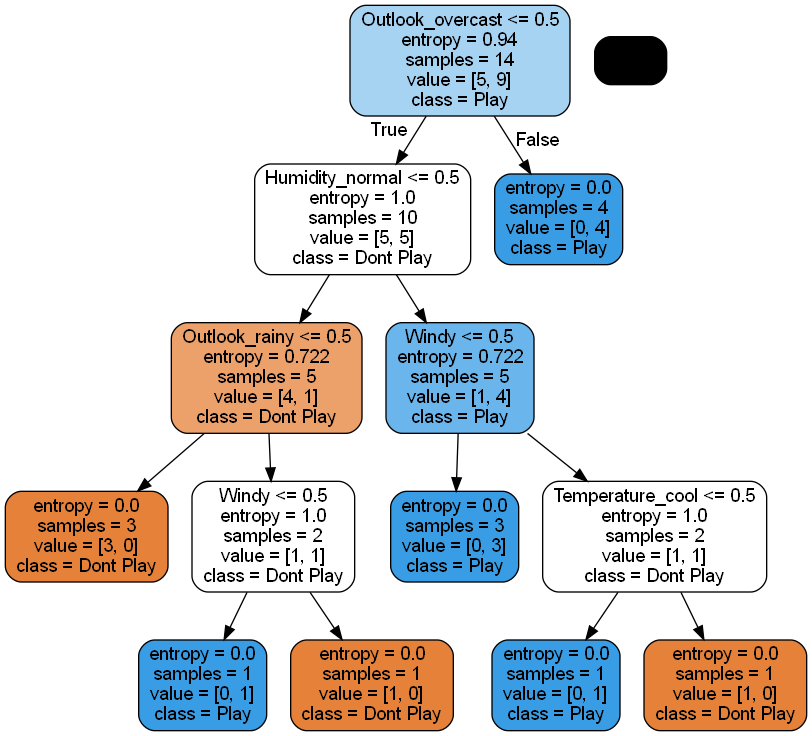

In [10]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names = list(x.columns.values), class_names=['Dont Play', 'Play'], 
                                 rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(data_plot)

Image(graph.create_png())

   Start     Intermediary     End    
     lat lng          lat lng lat lng
0    NaN NaN          NaN NaN NaN NaN
1    NaN NaN          NaN NaN NaN NaN
2    NaN NaN          NaN NaN NaN NaN
3    NaN NaN          NaN NaN NaN NaN
4    NaN NaN          NaN NaN NaN NaN
5    NaN NaN          NaN NaN NaN NaN
6    NaN NaN          NaN NaN NaN NaN
7    NaN NaN          NaN NaN NaN NaN
8    NaN NaN          NaN NaN NaN NaN
9    NaN NaN          NaN NaN NaN NaN
10   NaN NaN          NaN NaN NaN NaN
11   NaN NaN          NaN NaN NaN NaN
12   NaN NaN          NaN NaN NaN NaN
13   NaN NaN          NaN NaN NaN NaN
